In [ ]:
#!pip install opencv-python
#!pip install mss
#!pip install pydirectinput
#!pip install gym gym-retro

# Environment Setup

In [1]:
# For screen capture
from mss import mss
# For sending commands
import pydirectinput
# For frame preprocessing
import cv2
# For array transformations
import numpy as np
# For plotting frames
from matplotlib import pyplot as plt
# For slowing down game
import time
# Bese Environment components
from gym import Env
from gym.spaces import Box, Discrete

In [38]:
class Flappy_Bird(Env):
    
    def __init__(self):
        super().__init__()
        # Specify observation space and action space
        self.observation_space = Box(low=0, high=255, shape=(1,40,40), dtype=np.uint8)
        self.action_space = Discrete(2)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 170, 'left': 500, 'width': 550, 'height': 488}
        self.done_location = {'top': 270, 'left': 540, 'width': 1, 'height': 1}
        self.x_click = 550
        self.y_click = 600
        
    def step(self, action):
        # Action
        if action == 0:
            # Jump
            pydirectinput.press("space")
        else:
            # Do nothink
            time.sleep(0.18)

        # Checking if game is done
        done, done_cap = self.get_done() 
        # Getting observation
        observation = self.get_observation()
        reward = 1 
        info = {}
        return observation, reward, done, info
    
    def reset(self):
        # Reseting game
        time.sleep(1.5)
        pydirectinput.click(x=550, y=600)
        time.sleep(0.4)
        pydirectinput.press("space")
        return self.get_observation()
        
    def render(self):
        # Rendering
        cv2.imshow('Game', self.current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()
    
    def get_observation(self):
        # Frame preprocessing
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (40,40))
        channel = np.reshape(resized, (1,40,40))
        return channel
    
    def get_done(self):
        # Has game ended
        done_cap = np.array(self.cap.grab(self.done_location))
        done=False
        if 680 < np.sum(done_cap) < 715 :
            done = True
            
        return done, done_cap
    
    def close(self):
        # Closing env
        cv2.destroyAllWindows()

# Testing Environment

In [39]:
# Creating environment
env = Flappy_Bird()

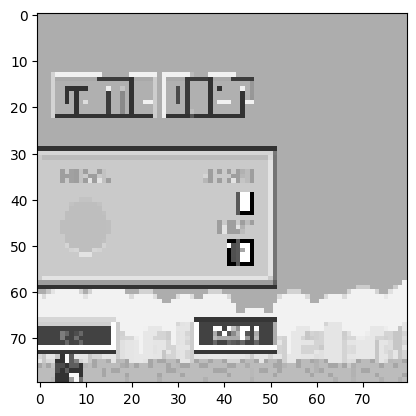

In [40]:
# Getting observation
obs = env.get_observation()
# Plotting observation
plt.imshow(cv2.cvtColor(obs[0], cv2.COLOR_GRAY2BGR));

Is game done?: True


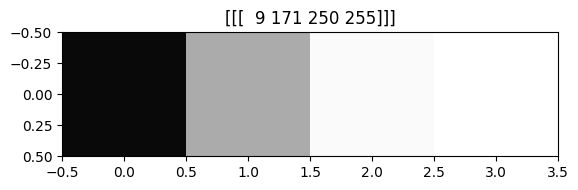

In [41]:
# Checking if game has ended and what rgb values are condition for ending game
done, done_cap = env.get_done()

print("Is game done?:",done)
plt.title(f"{done_cap}")
plt.imshow(cv2.cvtColor(done_cap[0], cv2.COLOR_GRAY2BGR));
plt.show()

In [42]:
# Games with random action
for episode in range(4):  
    obs = env.reset()
    done = False
    total_reward = 0
    
    while not done: 
        action = env.action_space.sample()
        print(action, end="-")
        obs, reward, done, info =  env.step(action)
        total_reward += reward
        
    print(f'Total Reward for episode {episode} is {total_reward}') 

1-0-0-0-0-0-0-1-0-1-1-0-0-0-0-Total Reward for episode 0 is 15
1-0-1-1-1-1-1-0-Total Reward for episode 1 is 8
0-1-1-1-0-0-1-Total Reward for episode 2 is 7
0-1-0-0-0-0-0-0-1-0-1-0-1-1-0-Total Reward for episode 3 is 15


In [23]:
# Checkign for errors in environment
from stable_baselines3.common import env_checker
print(env_checker.check_env(env))

None
